# 5. Tutorial 3: Epidemiology model (2)

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### May 11, 2023

In [1]:
using Plots

## 1. Spatial SIR model

#### Assume that each agent $n \in [0,1]$  is located at $(x_{n,t},y_{n,t})\in \mathcal{S}$ at date $t$,  where $\mathcal{S}=[0,1]\times[0,1]$.
#### The location of each agent follows a random walk bounded by $\mathcal{S}$:
#### $$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
#### $$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
#### where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.
#### The state of an agent is defined as $s_{n,t}=(x_{n,t}, y_{n,t}, h_{n,t})$ where $h_t$ is either "Susceptible" ($S$), "Infected" ($I$) or "Recovered" ($R$).
#### $S_t$ represents the number of people at time $t$ who are susceptible to the disease infection. An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected if there is an infected agent within a radius $r>0$.
#### $I_t$ is the number of infected agents at time $t$ who recover with probability $\Pi$.
#### $R_t$ is the number of agents at time $t$ who recovered from the infected state.

#### Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.

In [3]:
struct Agent
    x::Float64
    y::Float64
    h::Int64    # 0 if susceptible, 1 if infected, 2 if recovered
end

In [4]:
# Creat a function to get an initial state of an agent
Agent() = Agent(rand(), rand(), 0)
Agent()

Agent(0.1469375233398863, 0.7352650910058278, 0)

In [7]:
# Creat boolean functions to indentify agents' states
susceptible(agent::Agent) = (agent.h==0)
infected(agent::Agent) = (agent.h==1)
recovered(agent::Agent) = (agent.h==2)

recovered (generic function with 1 method)

In [8]:
infected(Agent())
recovered(Agent())
susceptible(Agent())

true

#### Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the agent's location.



In [6]:
function spatial_transition(s::Agent; σ=0.1)
    x = 
    y = 
    x = 
    y = 
    return Agent(x,y,s.h)
end

spatial_transition (generic function with 1 method)

In [138]:
# Example: 100 agents
population = [Agent() for i=1:100]
[population spatial_transition.(population)]

100×2 Matrix{Agent}:
 Agent(0.252888, 0.463532, 0)   Agent(0.331466, 0.482874, 0)
 Agent(0.616202, 0.879387, 0)   Agent(0.559968, 0.923118, 0)
 Agent(0.91476, 0.552647, 0)    Agent(0.815955, 0.753462, 0)
 Agent(0.230946, 0.0687427, 0)  Agent(0.217452, 0.0348562, 0)
 Agent(0.589388, 0.199941, 0)   Agent(0.484097, 0.319709, 0)
 Agent(0.252921, 0.801836, 0)   Agent(0.217724, 0.762898, 0)
 Agent(0.696481, 0.115942, 0)   Agent(0.773786, 0.09933, 0)
 Agent(0.564595, 0.699806, 0)   Agent(0.447427, 0.573359, 0)
 Agent(0.366341, 0.0779016, 0)  Agent(0.267014, 0.150867, 0)
 Agent(0.506713, 0.617898, 0)   Agent(0.494701, 0.631097, 0)
 Agent(0.756751, 0.476541, 0)   Agent(0.751868, 0.529036, 0)
 Agent(0.863976, 0.224237, 0)   Agent(0.619121, 0.337869, 0)
 Agent(0.0733045, 0.331108, 0)  Agent(0.094845, 0.448153, 0)
 ⋮                              
 Agent(0.174493, 0.125414, 0)   Agent(0.226896, 0.131676, 0)
 Agent(0.924162, 0.765043, 0)   Agent(0.954397, 0.807134, 0)
 Agent(0.0797575, 0.970493, 0) 

#### Create a function `plot_status` to plot all agents' status: location and health status.

In [242]:
function plot_status(agents::Vector{Agent})
    Plots.plot([[agent.x for agent in agents if susceptible(agent)],  #x-axis: Susceptible
                [agent.x for agent in agents if infected(agent)],     #x-axis: Infected
                [agent.x for agent in agents if recovered(agent)]],   #x-axis: Recovered
               [[agent.y for agent in agents if susceptible(agent)],  #y-axis: Susceptible
                [agent.y for agent in agents if infected(agent)],     #y-axis: Infected
                [[agent.y for agent in agents if recovered(agent)]]], #y-axis: Recovered
               xlabel     = "x",
               ylabel     = "y",
               #title      = "Status of agents",
               label      = ["Susceptible" "Infected" "Recovered"],
               st = :scatter,
               #linecolor  = [:red],
               markercolor = [:blue :red :green],
               markerstrokecolor = [:blue :red :green],
              #alpha = [i for i in range(0.05, 0.8, length=20)]',
              #linewidth  = 2,
               markersize=3,
              #linestyle  = [:solid :dash],
               size       = (600,500),
               legend     = :topright)
end

plot_status (generic function with 1 method)

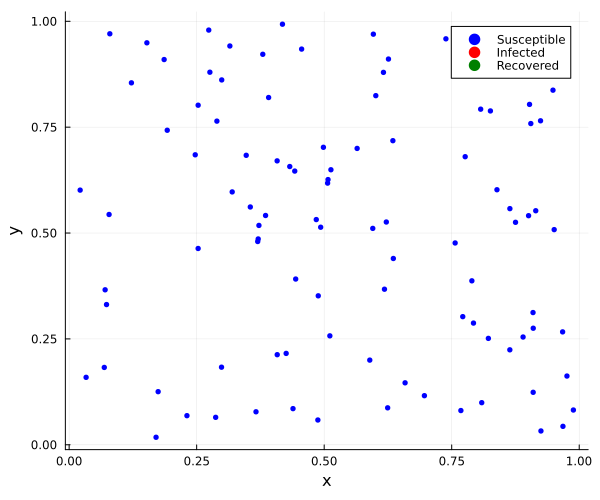

In [243]:
plot_status(population)

#### Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.


In [263]:
# Write a function to count number of infected agents within r radius
function contact(agent::Agent, agents::Vector{Agent}, r=0.001)






end

contact (generic function with 2 methods)

In [264]:
function evolve(agents::Vector{Agent}, Π=0.1)







end

evolve (generic function with 2 methods)

#### Write a function `simulate(S0::Vector[Agent])` to simulate the economy starting from an initially random position with 1 infected agent.

In [12]:
N = 10000
population_0 = [Agent() for i=1:N]
infect(agent::Agent) = Agent(agent.x, agent.y, 1)
population_0[1] = infect(population_0[1])

Agent(0.47588575196863014, 0.9503009837399734, 1)

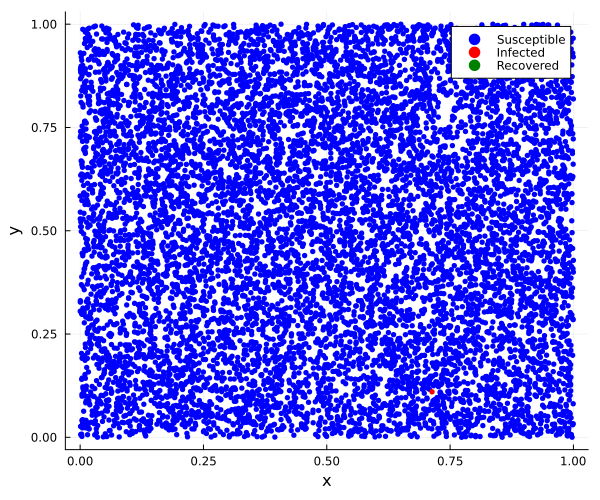

In [292]:
plot_status(population_0)

In [293]:
function simulate(population_0; T=300)





end

simulate (generic function with 1 method)

In [294]:
sims = simulate(population_0);

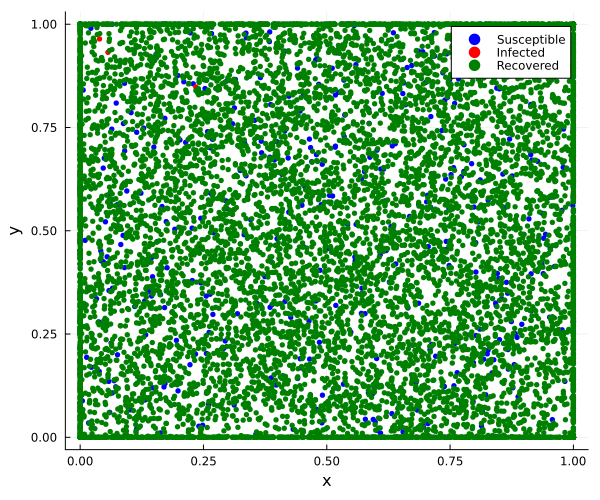

In [296]:
plot_status(sims[201])

### Plot an animation of the agents' transition.

Animation("C:\\Users\\tanin\\AppData\\Local\\Temp\\jl_r45bdO", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])